# IBM Watson Marketing Data Analysis & Prediction
@Pankaj Joshi

In [14]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()
from subprocess import check_output
import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv('./data/WA_Fn-UseC_-Marketing-Customer-Value-Analysis.csv')

def annot_plot(ax, w, h):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    for p in ax.patches:
        ax.annotate(f"{p.get_height() * 100 / df.shape[0]:.2f}%", (p.get_x() + p.get_width() /2., p.get_height()),
                   ha='center', va='center', fontsize=11, color='black', rotation=0, xytext=(0, 10),
                   textcoords='offset points')

def annot_plot_num(ax, w, h):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    for p in ax.patches:
        ax.annotate('{0:.1f}'.format(p.get_height()), (p.get_x()+w, p.get_height()+h))

import os
print(os.listdir("./data"))

['WA_Fn-UseC_-Marketing-Customer-Value-Analysis.csv']


## 1. Data Loading

In [15]:
df = pd.read_csv('./data/WA_Fn-UseC_-Marketing-Customer-Value-Analysis.csv')
df.head()


,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [16]:
df.shape

(9134, 24)

In [17]:
df.Response = df.Response.apply(lambda x: 0 if x == 'No' else 1)
df.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,0,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,0,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,0,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,0,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,0,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


## 2.2 Exploratory Data Analysis (EDA)

In [18]:
df.info()
# 23 个字段，首位为 ID

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   int64  
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

In [19]:
df.isnull().sum()
## no null

Customer                         0
State                            0
Customer Lifetime Value          0
Response                         0
Coverage                         0
Education                        0
Effective To Date                0
EmploymentStatus                 0
Gender                           0
Income                           0
Location Code                    0
Marital Status                   0
Monthly Premium Auto             0
Months Since Last Claim          0
Months Since Policy Inception    0
Number of Open Complaints        0
Number of Policies               0
Policy Type                      0
Policy                           0
Renew Offer Type                 0
Sales Channel                    0
Total Claim Amount               0
Vehicle Class                    0
Vehicle Size                     0
dtype: int64

In [20]:
df.describe()

,Customer Lifetime Value,Response,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,8004.940475,0.143201,37657.380009,93.219291,15.097000,48.064594,0.384388,2.966170,434.088794
std,6870.967608,0.350297,30379.904734,34.407967,10.073257,27.905991,0.910384,2.390182,290.500092
min,1898.007675,0.000000,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007
25%,3994.251794,0.000000,0.000000,68.000000,6.000000,24.000000,0.000000,1.000000,272.258244
50%,5780.182197,0.000000,33889.500000,83.000000,14.000000,48.000000,0.000000,2.000000,383.945434
75%,8962.167041,0.000000,62320.000000,109.000000,23.000000,71.000000,0.000000,4.000000,547.514839
max,83325.381190,1.000000,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678


## 2.1 Response Rate:

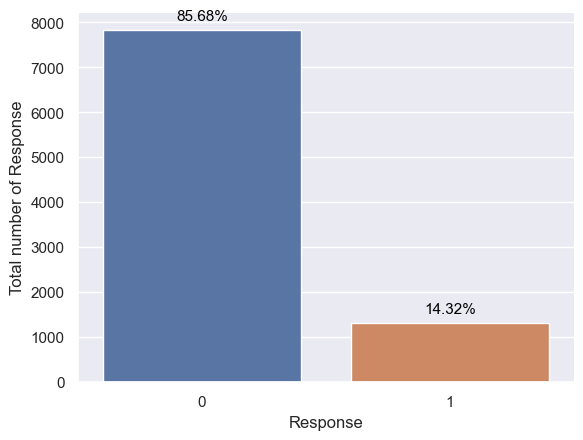

In [21]:
ax = sns.countplot(x='Response', data=df)
plt.ylabel("Total number of Response")
annot_plot(ax, 0.08, 1)
plt.show()

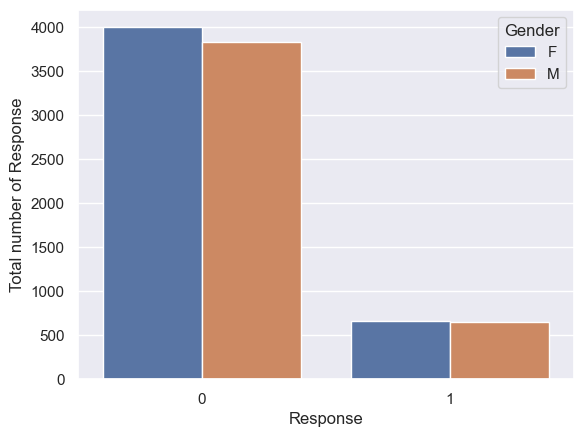

In [26]:
ax = sns.countplot(x='Response', hue='Gender', data=df)
plt.ylabel("Total number of Response")
# annot_plot(ax, 0.08, 1)
plt.show()


> 所以，Response 与否明显和性别无关

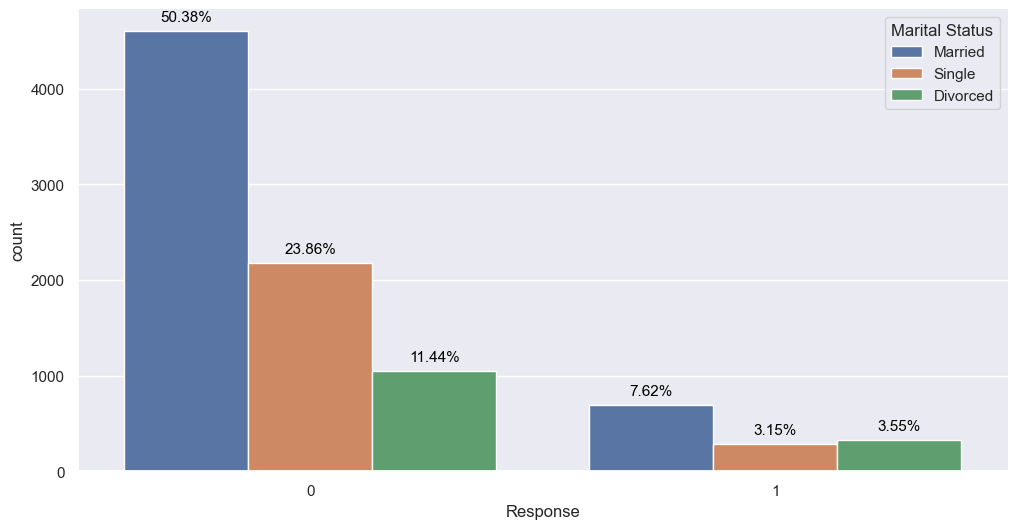

In [31]:
plt.figure(figsize=(12, 6))
ax = sns.countplot(x='Response', hue=df['Marital Status'], data=df)
annot_plot(ax, 0.08, 1)
plt.show()

> 坦白的说，我看不出 response 与否与婚姻状况有什么关系

## 2.1.1 Response Rate by renew offer

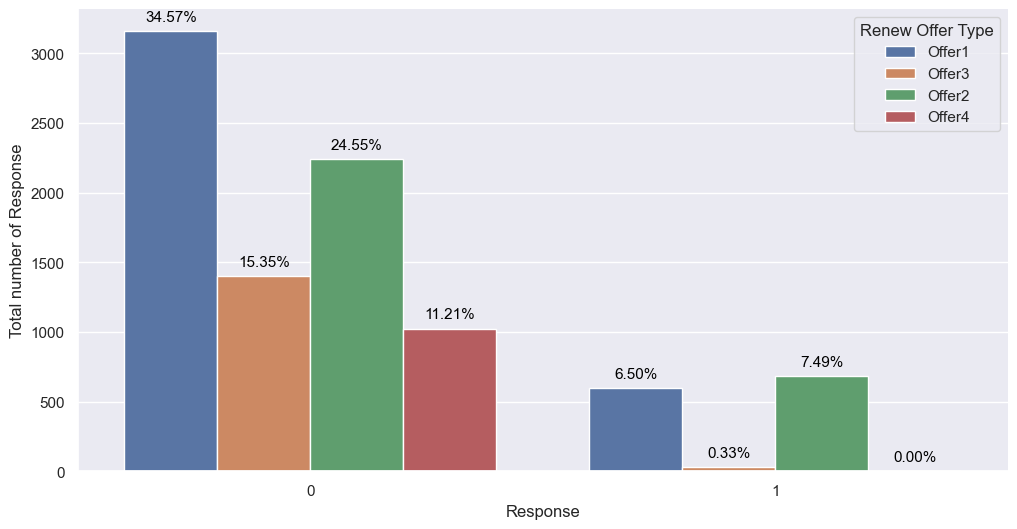

In [40]:
plt.figure(figsize=(12, 6))
ax = sns.countplot(data=df, hue="Renew Offer Type", x="Response")
plt.ylabel("Total number of Response")
annot_plot(ax, 0.08, 1)
plt.show()

> 和婚姻状态类似，无法使用肉眼简单看出逻辑关系，Offer4 看来对于Response = 1 的人来说不可接受, BTW offer3 也好不到哪儿去，但你说这就有逻辑关系？ 我是不信的

## 2.1.2 Response Rate by Education

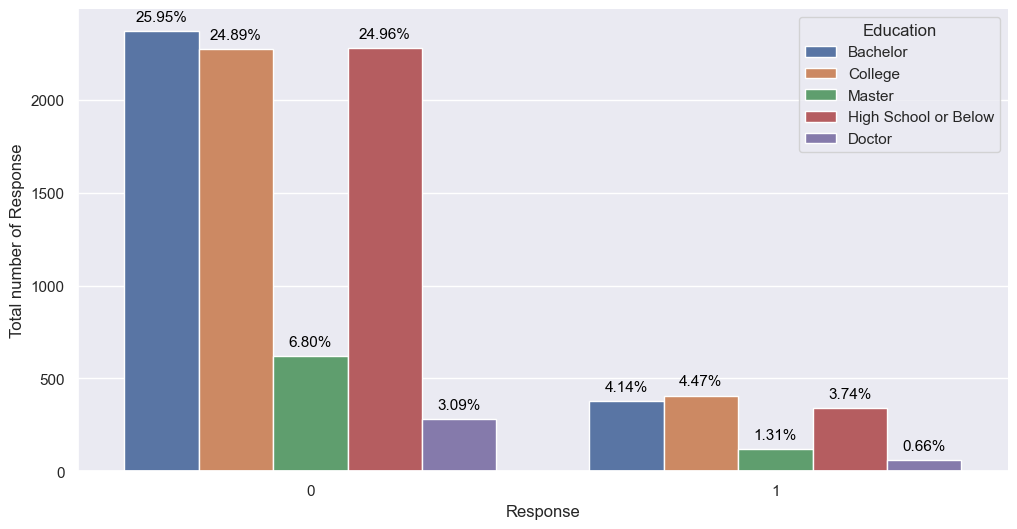

In [41]:
plt.figure(figsize=(12, 6))
ax = sns.countplot(data=df, hue="Education", x="Response")
plt.ylabel("Total number of Response")
annot_plot(ax, 0.08, 1)
plt.show()

> 所以，这也是个决策树模型？一层层匹配这些开关项？

## 2.1.3 Response Rate by Sales Channel

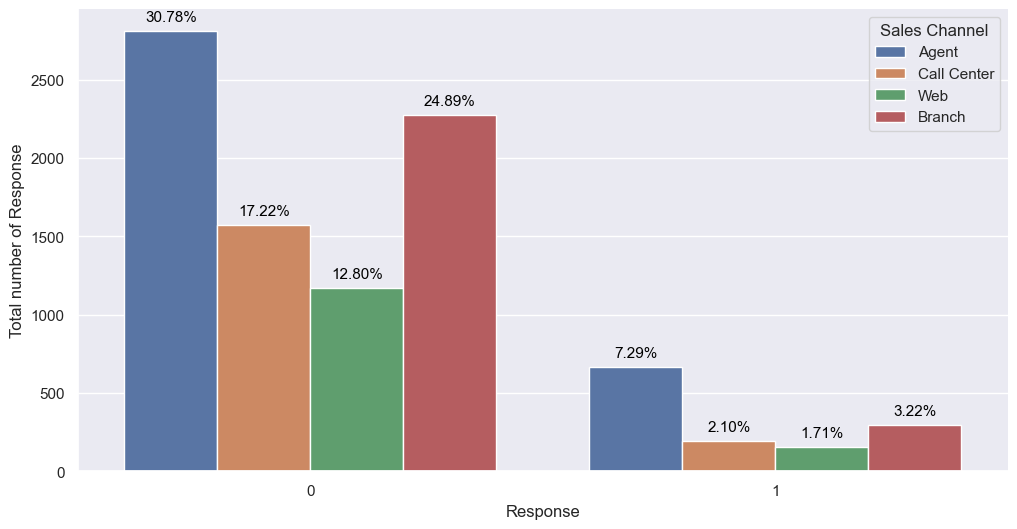

In [43]:
plt.figure(figsize=(12, 6))
ax = sns.countplot(data=df, hue="Sales Channel", x="Response")
plt.ylabel("Total number of Response")
annot_plot(ax, 0.08, 1)
plt.show()

## 2.1.4 Response Rate by Total Claim Amount

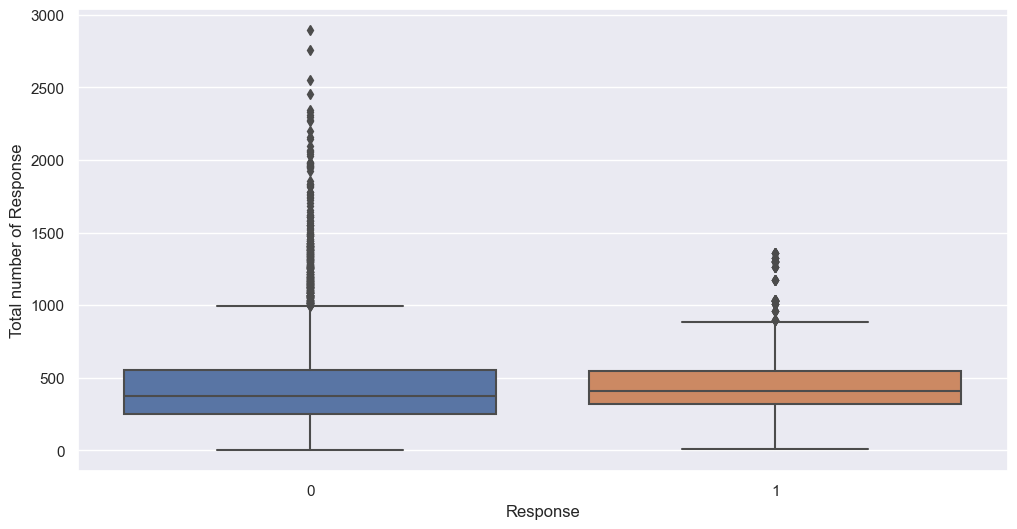

In [45]:
plt.figure(figsize=(12, 6))
sns.boxplot(y="Total Claim Amount", x="Response", data=df)
plt.ylabel("Total number of Response")
plt.show()